In [56]:
import tensorflow as tf
assert tf.__version__.startswith('2')

import os
import numpy as np
import matplotlib.pyplot as plt

In [57]:
tf.__version__

'2.2.0'

Sometimes the file is cannot be extracted. Run this in that case

In [58]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [59]:
!ls "/content/gdrive/Shared drives/Bangkit Data/Bany"

 12.ipynb
 cass
'Copy of MobileNetV2.ipynb'
'Copy of MobileNetV2_with_augmentation.ipynb'
'Copy of MobileNetV2_with_augmentation_maxpool_no_aug.ipynb'
 InceptionV3_with_augmentation_maxpool_no_aug_2.ipynb
 MobileNetV2_with_augmentation_maxpool_aug.ipynb
 MobileNetV2_with_augmentation_maxpool_no_aug.ipynb
 model2
 model3
 model_mobileNetV2
 ResNet152V2_no_aug.ipynb
 train
 train_augmentation
 VGG16_with_no_aug.ipynb
 VGG19_no_aug_3.ipynb


In [60]:
PATH = "/content/gdrive/Shared drives/Bangkit Data/Bany/train"

In [61]:
os.listdir(PATH)

['cmd', 'cbsd', 'cbb', 'healthy', 'cgm']

In [62]:
cbb_dir = os.path.join(PATH, 'cbb')
#cgm_augmentation_dir = os.path.join(PATH, 'cgm_augmentation')
cgm_dir = os.path.join(PATH, 'cgm')
#cbsd_augmentation_dir = os.path.join(PATH, 'cbsd_augmentation')
cbsd_dir = os.path.join(PATH, 'cbsd')
cmd_dir = os.path.join(PATH, 'cmd')
healthy_dir = os.path.join(PATH, 'cmd')

In [63]:
print(len(os.listdir(cbb_dir)))
print(len(os.listdir(cbsd_dir)))
print(len(os.listdir(cgm_dir)))
print(len(os.listdir(healthy_dir)))
print(len(os.listdir(cmd_dir)))

466
1443
773
2658
2658


In [64]:
import natsort
cbsd_list = natsort.natsorted(os.listdir(cbsd_dir))
len(cbsd_list)
cbsd_list[1]

'train-cbsd-1.jpg'

In [65]:
#import natsort
#dir_cbb = natsort.natsorted(os.listdir("/content/gdrive/Shared drives/Bangkit Data/Bany/train_augmentation/cbb"))
#dir_cbsd = natsort.natsorted(os.listdir("/content/gdrive/Shared drives/Bangkit Data/Bany/train_augmentation/cbsd"))
#dir_cgm = natsort.natsorted(os.listdir("/content/gdrive/Shared drives/Bangkit Data/Bany/train_augmentation/cgm"))
#dir_cmd = natsort.natsorted(os.listdir("/content/gdrive/Shared drives/Bangkit Data/Bany/train_augmentation/cmd"))
#dir_healthy = natsort.natsorted(os.listdir("/content/gdrive/Shared drives/Bangkit Data/Bany/train_augmentation/healthy"))
#print(len(dir_cbb))
#print(len(dir_cbsd))
#print(len(dir_cgm))
#print(len(dir_cmd))
#print(len(dir_healthy))


In [66]:
base_dir = PATH

In [81]:
IMAGE_SIZE = 224
BATCH_SIZE = 64

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2)

train_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE, 
    subset='training')

val_generator = datagen.flow_from_directory(
    base_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    shuffle=False, 
    subset='validation')

Found 4527 images belonging to 5 classes.
Found 1129 images belonging to 5 classes.


In [82]:
print (train_generator.class_indices)

{'cbb': 0, 'cbsd': 1, 'cgm': 2, 'cmd': 3, 'healthy': 4}


In [83]:
for image_batch, label_batch in train_generator:
  break
image_batch.shape, label_batch.shape

((64, 224, 224, 3), (64, 5))

In [84]:
# Define the model

# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(56, activation = 'relu'),
    tf.keras.layers.Dense(5, activation = 'softmax')])

# Compile Model. 
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

# Train the Model
history = model.fit(
train_generator, 
epochs=8,
validation_data=val_generator)



Epoch 1/8
71/71 [==============================] - 55s 770ms/step - loss: 1.8368 - accuracy: 0.4208 - val_loss: 1.2829 - val_accuracy: 0.4703
Epoch 2/8
71/71 [==============================] - 55s 774ms/step - loss: 1.2565 - accuracy: 0.4983 - val_loss: 1.1669 - val_accuracy: 0.5518
Epoch 3/8
71/71 [==============================] - 54s 758ms/step - loss: 1.0928 - accuracy: 0.5882 - val_loss: 1.1113 - val_accuracy: 0.5961
Epoch 4/8
71/71 [==============================] - 54s 762ms/step - loss: 0.8981 - accuracy: 0.6547 - val_loss: 1.1388 - val_accuracy: 0.5740
Epoch 5/8
71/71 [==============================] - 55s 773ms/step - loss: 0.6419 - accuracy: 0.7696 - val_loss: 1.2068 - val_accuracy: 0.5731
Epoch 6/8
71/71 [==============================] - 54s 757ms/step - loss: 0.3873 - accuracy: 0.8785 - val_loss: 1.3879 - val_accuracy: 0.5926
Epoch 7/8
71/71 [==============================] - 54s 766ms/step - loss: 0.1982 - accuracy: 0.9459 - val_loss: 1.5968 - val_accuracy: 0.5252
Epoch 

In [85]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 109, 109, 32)      9248      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 54, 54, 32)        0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 93312)             0         
_________________________________________________________________
dense_18 (Dense)             (None, 56)                5225528   
_________________________________________________________________
dense_19 (Dense)             (None, 5)                

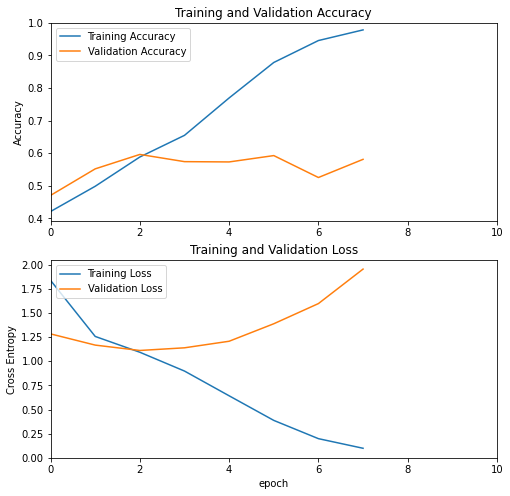

In [86]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='upper left')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.xlim(0,10)
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper left')
plt.ylabel('Cross Entropy')
plt.ylim([0,max(plt.ylim())])
plt.xlim(0,10)
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [87]:
classes = np.argmax(model.predict(val_generator), axis=-1)
y_true = val_generator.classes

In [88]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Accuracy: 0.581045
Precision: 0.581045
Recall: 0.581045
F1 score: 0.581045
              precision    recall  f1-score   support

           0       0.35      0.09      0.14        93
           1       0.52      0.69      0.60       288
           2       0.18      0.08      0.11       154
           3       0.66      0.80      0.73       531
           4       0.65      0.17      0.28        63

    accuracy                           0.58      1129
   macro avg       0.47      0.37      0.37      1129
weighted avg       0.53      0.58      0.53      1129



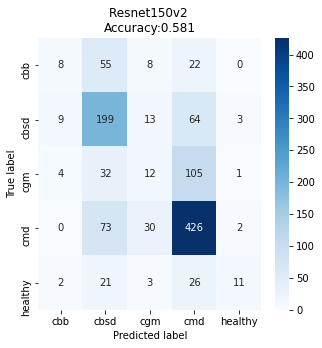

In [89]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_true, classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_true, classes,  average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_true, classes,  average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_true, classes, average='micro')
print('F1 score: %f' % f1)
# kappa
#kappa = cohen_kappa_score(y_true, classes)
#print('Cohens kappa: %f' % kappa)
# ROC AUC
#auc = roc_auc_score(y_true, predict,multi_class='ovo')
#print('ROC AUC: %f' % auc)
# confusion matrix
matrix = confusion_matrix(y_true, classes)
#print(matrix)
print(classification_report(y_true, classes))

cm_df = pd.DataFrame(matrix,
                     index = ['cbb','cbsd','cgm', 'cmd', 'healthy'], 
                     columns = ['cbb','cbsd','cgm', 'cmd', 'healthy'])

plt.figure(figsize=(5,5))
sn.heatmap(cm_df, annot=True,cmap='Blues', fmt='g')
plt.title('Resnet150v2 \nAccuracy:{0:.3f}'.format(accuracy_score(y_true, classes)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [90]:
# Save the entire model as a SavedModel.
!mkdir -p saved_model
model.save('/content/gdrive/Shared drives/Bangkit Data/Valdi/baseline_model') 

INFO:tensorflow:Assets written to: /content/gdrive/Shared drives/Bangkit Data/Valdi/baseline_model/assets


In [ ]:
!pip install tensorflowjs
import tensorflowjs as tfjs
from datetime import datetime
datestring = datetime.now().strftime("%Y%m%d%H%M%S")

     |████████████████████████████████| 61kB 1.8MB/s 
     |████████████████████████████████| 92kB 3.2MB/s 
     |████████████████████████████████| 144.4MB 101kB/s 
     |████████████████████████████████| 256kB 35.6MB/s 
     |████████████████████████████████| 921kB 35.6MB/s 
  Created wheel for PyInquirer: filename=PyInquirer-1.0.3-cp36-none-any.whl size=32851 sha256=c709c6eb25046446a4cad3c8704de10813e11973128976efbf9c4bf2b91039c6
  Stored in directory: /root/.cache/pip/wheels/52/6c/b1/3e4b0e8daf42a92883c7641c0ea8ffb62e0490ebed2faa55ad
Successfully built PyInquirer
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: tensorflow-hub 0.8.0
    Uninstalling tensorflow-hub-0.8.0:
      Successfully uninstalled tensorflow-hub-0.8.0
  Found existing installation: prompt-toolkit 1.0.18
    Uninstalling prompt-toolkit-1.0.18:
      Successfully uninstalled prompt-toolkit-1.0.18
  Found existing installation

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)


In [91]:
#tmp_path = "/tmp/keras_tfjs_{}".format(datestring)
#if os.path.isdir(tmp_path): shutil.rmtree(tmp_path)
#os.makedirs(tmp_path, exist_ok=True)
tfjs.converters.save_keras_model(model, "/content/gdrive/Shared drives/Bangkit Data/Valdi/model2.json")

/usr/local/lib/python3.6/dist-packages/tensorflowjs/converters/keras_h5_conversion.py:122: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  return h5py.File(h5file)
